**Please enter your name and email in the textbox below, and state whether or not you are planning to take the next available Module 1 Assessment.  This way, we will make sure you receive feedback on the assignment as soon as possible.**

*Name*:

*Email*:

*I plan to take the next available Module 1 Assessment*: Yes/No

# Module 1, Part 1

Please complete this assignment in Google Colab.  The assignment for Module 2 will be completed in a Jupyter Notebook.  We will alternate between the two environments so that you can get experience with both.

Each of you is assigned to a Track numbered from 1 to 7.  Your Track will posted on Canvas and will be the same across all homeworks.  Members of your group will be assigned to the same track so that you can more easily help each other with assignment questions.

There are two files distributed with this assignment: 


*   cmpe_188_diabetes.csv is the dataset for this assignment
*   DataDictionary.csv provides supplemental information about what the different attributes of the dataset.

Please submit all parts of the Module 1 assignment as 1 notebook in the Canvas assignment for Module 1 ("Module 1 Homework).

# Section 1: Basic Initialization 



## Setting up your environment  
In this module, you will be using the pandas, matplotlib, and seaborn libraries, among others.  [Pandas](https://pandas.pydata.org/docs/) makes it easy to manipulate datasets, and 
[matplotlib](https://matplotlib.org/stable/tutorials/index) and [seaborn](https://seaborn.pydata.org/tutorial.html) provide powerful visualization tools.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns

##  Loading the data

Now we authenticate a Google Drive client to mount your drive and access the data file.

**Make sure to follow the interactive instructions.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Update the code below with the file path where you have uploaded the diabetes dataset onto your Google Drive.


In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Module 1/cmpe_188_diabetes.csv"    
df = pd.read_csv(file_path)

In [ ]:
df.tail(30)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,bilirubin_max,albumin_min,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
DF Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
130128,268769,7,19.0,36.686464,1,African American,M,165.1,Recovery Room,Operating Room / Recovery,1111,admit,SICU,0.261111,0,100.00,NaN,207.0,1602.05,1,0,NaN,21.0,1.40,NaN,4.0,6.0,0.0,5.0,162.0,161.0,31.0,0,51.0,NaN,NaN,NaN,NaN,38.0,133.0,...,NaN,NaN,4.9,4.9,139.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,2122.7616,1602.05,83.0,177.0,39.4,10.0
130129,266181,7,45.0,42.072205,0,Caucasian,M,188.0,Emergency Department,Operating Room / Recovery,1111,admit,SICU,0.025694,0,148.70,NaN,207.0,1602.11,1,0,NaN,17.0,0.81,1.00,4.0,6.0,0.0,1.0,202.0,117.0,30.0,1,126.0,62.6,62.6,378.0,7.219,39.0,138.0,...,242.0,242.0,5.8,5.8,138.0,138.0,27.6,27.6,62.6,45.4,7.323,7.21900,378.0,118.0,378.000000,295.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,1575.9360,1602.11,97.0,170.0,36.7,15.0
130130,207329,170,27.0,33.298060,0,African American,F,157.5,Emergency Department,Accident & Emergency,1108,admit,Med-Surg ICU,0.175694,0,82.60,4.1,124.0,305.02,0,0,0.5,12.0,0.66,NaN,4.0,6.0,0.0,5.0,114.0,112.0,29.0,0,115.0,NaN,NaN,NaN,NaN,43.0,137.0,...,323.0,323.0,4.0,4.0,137.0,137.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0.5,4.1,NaN,305.02,90.0,121.0,36.7,12.0
130131,269593,7,27.0,67.814990,1,African American,F,165.1,Operating Room,Operating Room / Recovery,1111,admit,SICU,0.850000,0,186.00,NaN,305.0,1802.01,1,0,NaN,NaN,NaN,0.28,4.0,6.0,0.0,5.0,99.0,106.0,31.0,0,120.0,47.3,47.3,78.0,7.352,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.3,47.3,7.352,7.35200,78.0,78.0,278.571429,278.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,NaN,NaN,1977.9552,1802.01,90.0,157.0,36.6,NaN
130132,253246,7,76.0,28.824211,0,African American,M,170.1,Direct Admit,Accident & Emergency,1104,admit,Cardiac ICU,0.048611,0,83.40,NaN,110.0,104.01,0,1,NaN,57.0,9.64,NaN,4.0,6.0,0.0,5.0,85.0,59.0,27.0,0,162.0,NaN,NaN,NaN,NaN,34.0,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,730.5120,104.01,113.0,223.0,36.7,57.0
130133,276511,7,66.0,28.766593,0,Caucasian,M,175.3,Direct Admit,Accident & Emergency,1106,admit,MICU,0.000000,0,88.40,NaN,304.0,312.03,0,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,NaN,42.0,NaN,0,55.0,NaN,NaN,NaN,NaN,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,312.03,58.0,119.0,32.9,NaN
130134,246917,7,60.0,44.243875,0,African American,F,165.1,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.448611,0,120.60,NaN,301.0,405.01,0,0,NaN,13.0,0.86,NaN,4.0,6.0,0.0,5.0,1


The code below sets the index to the dataframe to be the column "Unnamed: 0" (and then drops the column as it is no longer needed).  The index of a dataframe is the labels for the rows of the dataframe and can be set to a single value or a set of values (e.g., multiple columns together can serve as an index), both numbers and strings. For more information and examples, please go to: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html


In [4]:
df.index

RangeIndex(start=0, stop=130157, step=1)

In [5]:
df.index = df['Unnamed: 0']
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            130148, 130149, 130150, 130151, 130152, 130153, 130154, 130155,
            130156, 130157],
           dtype='int64', name='Unnamed: 0', length=130157)

In [7]:
df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,solid_tumor_with_metastasis,diabetes_mellitus,bilirubin_max,albumin_min,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,0,1,NaN,NaN,NaN,502.01,68.0,131.0,39.3,30.0
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,0,1,NaN,NaN,NaN,203.01,61.0,95.0,35.1,9.0
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,0,0,NaN,NaN,NaN,703.03,88.0,148.0,36.7,NaN
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,0,0,NaN,NaN,NaN,1206.03,NaN,NaN,34.8,NaN
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,0,0,NaN,NaN,NaN,601.01,99.0,130.0,36.7,NaN


\\### 1. Rename the index from 'Unnamed: 0' to "DF Index"

In [8]:
df.index.name = 'DF Index'

df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,solid_tumor_with_metastasis,diabetes_mellitus,bilirubin_max,albumin_min,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
DF Index,,,,,,,,,,,,,,,,,,,,,
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,0,1,NaN,NaN,NaN,502.01,68.0,131.0,39.3,30.0
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,0,1,NaN,NaN,NaN,203.01,61.0,95.0,35.1,9.0
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,0,0,NaN,NaN,NaN,703.03,88.0,148.0,36.7,NaN
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,0,0,NaN,NaN,NaN,1206.03,NaN,NaN,34.8,NaN
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,0,0,NaN,NaN,NaN,601.01,99.0,130.0,36.7,NaN


### 2. How many rows and columns does the dataset have?  Please write code to extract these values, and print them out.

In [9]:
df.shape

(130157, 188)

### 3. Use the pandas decribe() function to get a sense of the data in the dataset.

In [10]:
df.describe()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,...,solid_tumor_with_metastasis,diabetes_mellitus,bilirubin_max,albumin_min,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,...,130157.000000,130157.000000,10296.000000,11152.000000,66990.000000,129292.000000,118818.000000,118827.000000,123546.000000,116423.000000
mean,213000.856519,106.102131,61.995103,29.110260,0.189840,169.607219,662.428344,0.839933,0.0,83.791104,...,0.020852,0.216285,1.187979,3.007254,1800.803417,565.994296,75.901589,133.059136,36.420638,23.554154
std,38109.828146,63.482277,16.822880,8.262776,0.392176,10.833085,304.259843,2.485337,0.0,24.963063,...,0.142888,0.411712,2.375772,0.738457,1456.551481,466.510850,18.642800,27.573246,0.857584,18.708332
min,147000.000000,1.000000,0.000000,14.844926,0.000000,137.200000,82.000000,-0.250000,0.0,38.600000,...,0.000000,0.000000,0.200000,1.100000,0.000000,0.010000,37.000000,75.000000,32.100000,3.000000
25%,180001.000000,49.000000,52.000000,23.598006,0.000000,162.500000,427.000000,0.045833,0.0,66.500000,...,0.000000,0.000000,0.400000,2.500000,799.048800,204.010000,63.000000,113.000000,36.200000,12.000000
50%,213014.000000,112.000000,64.000000,27.564749,0.000000,170.100000,653.000000,0.155556,0.0,80.000000,...,0.000000,0.000000,0.700000,3.100000,1454.976000,409.020000,74.000000,130.000000,36.500000,17.000000
75%,246002.000000,165.000000,75.000000,32.803127,0.000000,177.800000,969.000000,0.423611,0.0,96.800000,...,0.000000,0.000000,1.100000,3.500000,2415.096000,703.030000,87.000000,150.000000,36.700000,29.000000
max,279000.000000,204.000000,89.000000,67.814990,1.000000,195.590000,1111.000000,175.627778,0.0,186.000000,...,1.000000,1.000000,58.000000,4.700000,8716.669632,2201.050000,144.000000,223.000000,39.700000,113.090000


## Handling categorical values

###4. Find the categorical features in the dataset.

In [11]:
categorial_feature = [i for i in df.columns if df[i].dtype == 'O']
df[categorial_feature].head()

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type
DF Index,,,,,,
1,Caucasian,M,Floor,Floor,admit,CTICU
2,Caucasian,F,Floor,Floor,admit,Med-Surg ICU
3,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU
4,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU
5,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU


###5. What are the different values each of the categorical feature can have?

In [12]:
for i in categorial_feature:
  print('{} unique values of the category {}'.format(len(df[i].unique()), i))

7 unique values of the category ethnicity
3 unique values of the category gender
16 unique values of the category hospital_admit_source
6 unique values of the category icu_admit_source
3 unique values of the category icu_stay_type
8 unique values of the category icu_type


###6. Encode the categorical features as numerical features

Hint: Use [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)


In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse =False)
df2 = pd.DataFrame(df[categorial_feature])
encoder.fit_transform(df2)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# Section 2: Data Quality 

## Data Quality Analysis

### 1. What are the data quality issues that you notice in the dataset?

A lot of null values

### 2. How many missing values are present in the *temp_apache* column

In [14]:
# Documentation for the isnull function is available here: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html 
df['temp_apache'].isnull().sum()

6611

### 3. Find the top 5 columns with the most missing values.


In [15]:
df.count()

encounter_id              130157
hospital_id               130157
age                       125169
bmi                       125667
elective_surgery          130157
                           ...  
apache_diagnosis          129292
diasbp_noninvasive_max    118818
sysbp_noninvasive_max     118827
temperature_apache        123546
bun_min                   116423
Length: 188, dtype: int64

In [ ]:
print(len(df.columns[df.isna().any()])) #Number of columns with null
df.isna().sum().nlargest(5)

168


h1_bilirubin_max    119861
h1_bilirubin_min    119861
bilirubin_max       119861
h1_albumin_max      119005
h1_albumin_min      119005
dtype: int64

### 3. Find the columns that have missing values in the specified range.

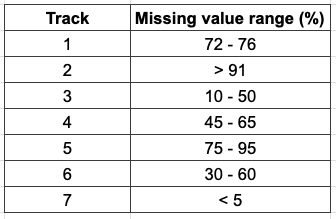

In [16]:
track6 = [i for i in df.columns 
            if (df[i].isnull().sum() > 0.30*len(df)) and (df[i].isnull().sum() < 0.60*len(df))   ] 
track6

['urineoutput_apache',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'urineoutput']

### 4. Drop (remove from the dataframe) the columns based on a missing value threshold


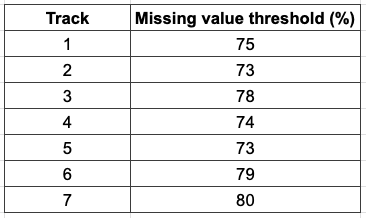

In [17]:
thresh = [i for i in df.columns if df[i].isnull().sum() > 0.79*len(df)]
df.drop(thresh, axis=1, inplace=True)
df

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
DF Index,,,,,,,,,,,,,,,,,,,,,
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,0,0,0,1,NaN,502.01,68.0,131.0,39.3,30.0
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,0,0,0,1,NaN,203.01,61.0,95.0,35.1,9.0
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,0,0,0,0,NaN,703.03,88.0,148.0,36.7,NaN
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,0,0,0,0,NaN,1206.03,NaN,NaN,34.8,NaN
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,0,0,0,0,NaN,601.01,99.0,130.0,36.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,...,0,0,0,0,1751.1552,104.01,102.0,161.0,36.2,NaN
130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,...,0,0,0,0,5724.7776,207.01,83.0,147.0,36.4,32.0
130155,219719,7,73.0,32.265371,0,African American,M,177.8,Emergency Department,Accident & Emergency,...,0,0,0,1,358.9920,102.01,70.0,134.0,32.9,30.0


## Data Imputation Strategies

In this section, you will experiment with 3-5 replacement strategies and evaluate their effectiveness.


###5. How many values of the feature corresponding to your track are missing?

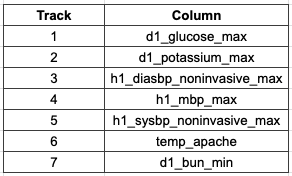

In [ ]:
df['temp_apache'].isnull().sum()

6611

**The sample code below shows imputation** for the *temp_apache* column which represents the temperature measured during the first 24 hours after a patient was admitted into the hospital. It is measured in Celsius. 

In [18]:
from scipy import stats

most_freq_gluc, count = stats.mode(df['temp_apache'])

most_freq_gluc = int(most_freq_gluc) # which temperature occurs most frequently in the dataset
most_freq_gluc

36

In [19]:
df['temp_apache'].describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache, dtype: float64

In [20]:
# Create a copy of the column where we will be filling in the missing values

df['temp_apache_mode'] = df['temp_apache'].copy()

In [21]:
df['temp_apache_mode'].replace(np.nan, most_freq_gluc, inplace=True)

In [22]:
df['temp_apache'].describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache, dtype: float64

In [23]:
df['temp_apache_mode'].describe()

count    130157.000000
mean         36.399273
std           0.840610
min          32.100000
25%          36.100000
50%          36.400000
75%          36.700000
max          39.700000
Name: temp_apache_mode, dtype: float64

**Below is the histogram of the column 'temp_apache' column before and after the imputation.**

The histogram shows the frequency of each value in the data (or when used for continues data, it first bins the values into discrete buckets) and is a good way to get a sense of the distribution of the data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'count')

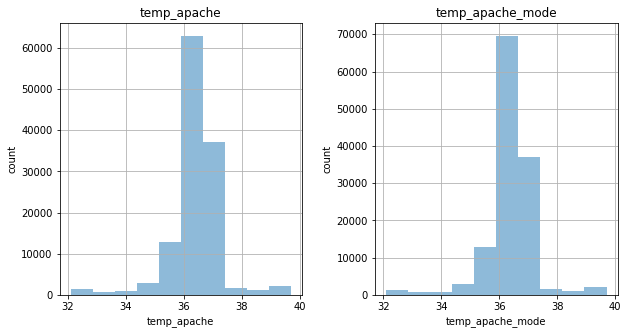

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
d1_glucose_max_mode = pd.DataFrame(df[['temp_apache','temp_apache_mode']])
d1_glucose_max_mode.hist(alpha=0.5, sharex=True, ax=ax)
ax[0].set_xlabel("temp_apache")
ax[0].set_ylabel("count")
ax[1].set_xlabel("temp_apache_mode")
ax[1].set_ylabel("count")

### 6. Add code for your replacement strategies below.

Replacement strategy-1:

In [25]:
h1_mbp_max_average = df['h1_mbp_max'].mean()
df['h1_mbp_max_mean'] = df['h1_mbp_max'].copy()
df['h1_mbp_max_mean'].replace(np.nan, h1_mbp_max_average, inplace=True)
df['h1_mbp_max_mean'].describe()


count    130157.000000
mean         91.287108
std          19.874095
min          49.000000
25%          78.000000
50%          91.000000
75%         102.000000
max         165.000000
Name: h1_mbp_max_mean, dtype: float64

Replacement strategy-2:

In [26]:
df_no_nan = df.dropna()
most_freq_h1_mbp_max = df_no_nan['h1_mbp_max'].mode()
most_freq_h1_mbp_max = int(most_freq_h1_mbp_max)
df['h1_mbp_max_mode'] = df['h1_mbp_max'].copy()
df['h1_mbp_max_mode'].replace(np.nan, most_freq_h1_mbp_max, inplace=True)
df['h1_mbp_max_mode'].describe()

count    130157.000000
mean         89.968279
std          20.685956
min          49.000000
25%          75.000000
50%          88.000000
75%         102.000000
max         165.000000
Name: h1_mbp_max_mode, dtype: float64

Replacement strategy-3: 

In [ ]:
h1_mbp_max_med = df['h1_mbp_max'].median()
df['h1_mbp_max_median'] = df['h1_mbp_max'].copy()
df['h1_mbp_max_median'].replace(np.nan, h1_mbp_max_med, inplace=True)
df['h1_mbp_max_median'].describe()

Replacement strategy-4 (optional): 

Replacement strategy-5 (optional): 

### 7. Create a table that shows how different replacement strategies affect dataset properties

* Dataset properties can be described in terms of basic statistics such as mean, median, mode, standard deviation 
* Which of the replacement strategies do you think works best in terms of preserving overall dataset properties?

Insert your table in this textbox.


### 8. Explore whether your best replacement strategy distorts the properties of some categories of patients/observations more than others

* Identify 2 or more categories (subsets) of patients (eg: 'ethnicity' is an example category) 
* Apply the best performing replacement strategy based on your conclusions in the previous question
* Investigate whether this strategy affects different categories of patients differently
* Summarize your findings

### 9. Fill in the missing values of *icu_admit_source* feature.